In [1]:
import rastereasy

Rastereasy
==========


In `rastereasy`, one of the main class to deal with georeferenced images is `Geoimage`. It contains the main functions (for resampling, reprojection, stack, plotting, ...). Let's start by opening and plotting an image, some bands or making color compositions

# 1) first step: open and visualize an image

In [2]:
name_im='./data/demo/sentinel.tif'
image=rastereasy.Geoimage(name_im)

Print basic information of the image

In [3]:
image.info()

- Size of the image:
   - Rows (height): 1000
   - Cols (width): 1000
   - Bands: 12
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.04099599, 38.39058840)
- Driver: GTiff
- Data type: int16
- Projection system: EPSG:32637
- Nodata: -32768.0

- Given names for spectral bands: 
   {'1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12}




As we can see, spectral bands car named `'1', '2', ...` in a dictionnary where the name is associated with its number in the image (from `1` to the number of bands).

Alternatively , we can give more explicit names to the spectral  bands by specifying them : 


In [4]:
# Alternatively, we can give names to bands
names = {"CO" : 1,"B": 2,"G":3,"R":4,"RE1":5,"RE2":6,"RE3":7,"NIR":8,"WA":9,"SWIR1":10,"SWIR2":11,"SWIR3":12}
image_names=rastereasy.Geoimage(name_im,names=names)
image_names.info()
# Note : this is equavalent to image.change_names(names)

- Size of the image:
   - Rows (height): 1000
   - Cols (width): 1000
   - Bands: 12
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.04099599, 38.39058840)
- Driver: GTiff
- Data type: int16
- Projection system: EPSG:32637
- Nodata: -32768.0

- Given names for spectral bands: 
   {'CO': 1, 'B': 2, 'G': 3, 'R': 4, 'RE1': 5, 'RE2': 6, 'RE3': 7, 'NIR': 8, 'WA': 9, 'SWIR1': 10, 'SWIR2': 11, 'SWIR3': 12}




Create a color composite using bands 4, 3, and 2

<Figure size 640x480 with 0 Axes>

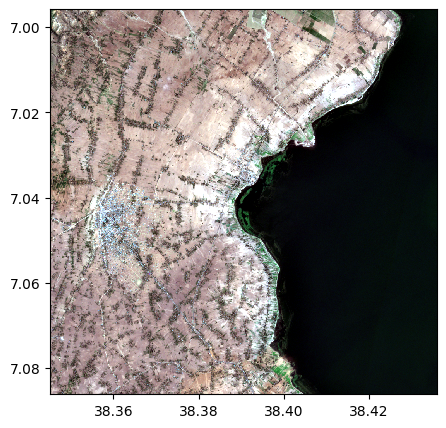

In [5]:
image.colorcomp(['4', '3', '2'])


# 2) Example of easy manipulations (resample, reproject. See dedicated examples for more details / options

Resample the image to a resolution of 2 meters


In [6]:
image_resampled = image.resampling(5)
image_resampled.info()
image.resampling(15,inplace=True) # inplace=True : modify directly the image
image.info()


- Size of the image:
   - Rows (height): 2000
   - Cols (width): 2000
   - Bands: 12
- Spatial resolution: 5.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.04101857, 38.39056574)
- Driver: GTiff
- Data type: int16
- Projection system: EPSG:32637
- Nodata: -32768.0

- Given names for spectral bands: 
   {'1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12}


- Size of the image:
   - Rows (height): 666
   - Cols (width): 666
   - Bands: 12
- Spatial resolution: 15.015015015015013  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.04097334, 38.39061114)
- Driver: GTiff
- Data type: int16
- Projection system: EPSG:32637
- Nodata: -32768.0

- Given names for spectral bands: 
   {'1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12}




Reproject the image to the EPSG:4326 coordinate system


- Size of the image:
   - Rows (height): 733
   - Cols (width): 733
   - Bands: 12
- Spatial resolution: 19.64992127401193  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.04099917, 38.39064373)
- Driver: GTiff
- Data type: int16
- Projection system: EPSG:27700
- Nodata: -32768.0

- Given names for spectral bands: 
   {'1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12}




<Figure size 640x480 with 0 Axes>

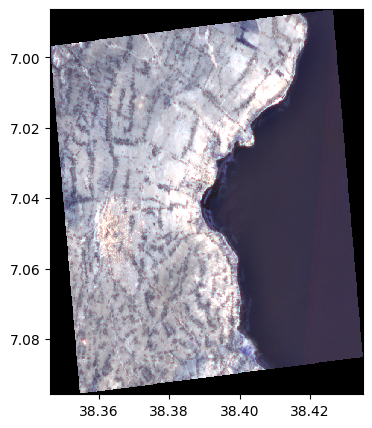

In [7]:
image_reproject = image.reproject("EPSG:27700")
image_reproject.info()
image_reproject.colorcomp()



Save the image

In [8]:
image_reproject.save('modify_image.tif')

One can combine operations

- Size of the image:
   - Rows (height): 1000
   - Cols (width): 1000
   - Bands: 12
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.04099599, 38.39058840)
- Driver: GTiff
- Data type: int16
- Projection system: EPSG:32637
- Nodata: -32768.0

- Given names for spectral bands: 
   {'CO': 1, 'B': 2, 'G': 3, 'R': 4, 'RE1': 5, 'RE2': 6, 'RE3': 7, 'NIR': 8, 'WA': 9, 'SWIR1': 10, 'SWIR2': 11, 'SWIR3': 12}




<Figure size 640x480 with 0 Axes>

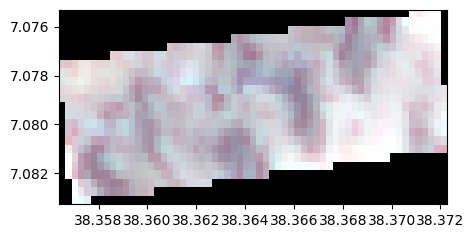

- Size of the image:
   - Rows (height): 23
   - Cols (width): 61
   - Bands: 12
- Spatial resolution: 39.353156172510154  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.07928894, 38.36432299)
- Driver: GTiff
- Data type: int16
- Projection system: EPSG:27700
- Nodata: -32768.0

- Given names for spectral bands: 
   {'CO': 1, 'B': 2, 'G': 3, 'R': 4, 'RE1': 5, 'RE2': 6, 'RE3': 7, 'NIR': 8, 'WA': 9, 'SWIR1': 10, 'SWIR2': 11, 'SWIR3': 12}




In [9]:
names = {"CO" : 1,"B": 2,"G":3,"R":4,"RE1":5,"RE2":6,"RE3":7,"NIR":8,"WA":9,"SWIR1":10,"SWIR2":11,"SWIR3":12}
image_names=rastereasy.Geoimage(name_im,names=names)
image_names.info()

image_modified=image_names.crop(50,100,120,300).resampling(30).reproject("EPSG:27700")
image_modified.colorcomp()
image_modified.info()

# Some general functions

## Sum, product, comparison, ...


### Weighted sum of images

<Figure size 640x480 with 0 Axes>

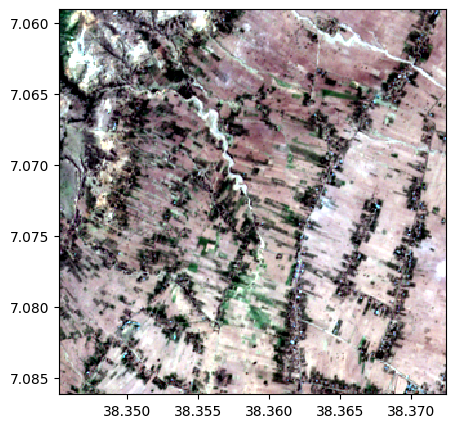

<Figure size 640x480 with 0 Axes>

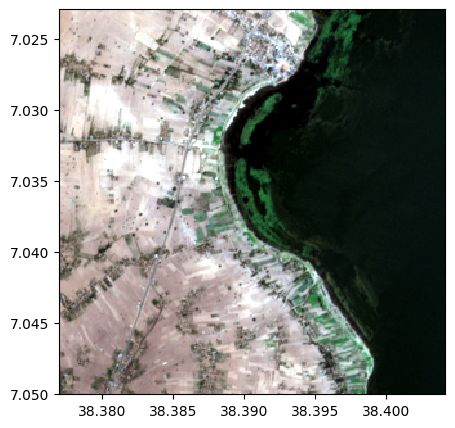

In [10]:
# 1. Read and plot two images
name_im1='./data/demo/im1.tif'
name_im2='./data/demo/im2.tif'

image1=rastereasy.Geoimage(name_im1)
image2=rastereasy.Geoimage(name_im2)
image1.colorcomp([4,3,2])
image2.colorcomp([4,3,2])


- Size of the image:
   - Rows (height): 300
   - Cols (width): 300
   - Bands: 12
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.07261482, 38.35885970)
- Driver: GTiff
- Data type: float64
- Projection system: EPSG:32637
- Nodata: -32768.0

- Given names for spectral bands: 
   {'1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12}




<Figure size 640x480 with 0 Axes>

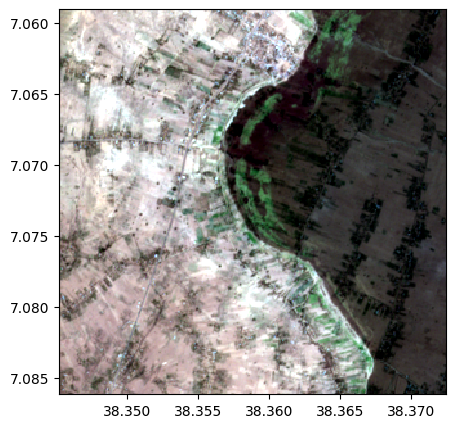

In [11]:
# Compute a weighted sum
weighted1=3
weighted2=5

image_sum=(weighted1*image1+weighted2*image2)/(weighted1+weighted2)
image_sum.info()
image_sum.colorcomp([4,3,2])

### Multiplication, division

- Size of the image:
   - Rows (height): 300
   - Cols (width): 300
   - Bands: 12
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.07261482, 38.35885970)
- Driver: GTiff
- Data type: float64
- Projection system: EPSG:32637
- Nodata: -32768.0

- Given names for spectral bands: 
   {'1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12}




<Figure size 640x480 with 0 Axes>

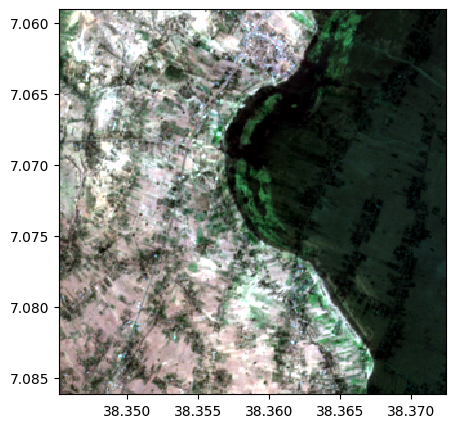

In [12]:
# Multiplication of images
image_product = image1*image2
image_product.info()
image_product.colorcomp([4,3,2])

- Size of the image:
   - Rows (height): 300
   - Cols (width): 300
   - Bands: 12
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.07261482, 38.35885970)
- Driver: GTiff
- Data type: float64
- Projection system: EPSG:32637
- Nodata: -32768.0

- Given names for spectral bands: 
   {'1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12}




<Figure size 640x480 with 0 Axes>

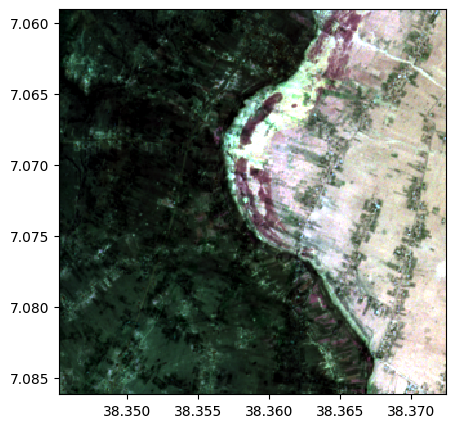

In [13]:
# Division of images
image_divide = image1/image2
image_divide.info()
image_divide.colorcomp([4,3,2])

### Compute ndvi

- Size of the image:
   - Rows (height): 300
   - Cols (width): 300
   - Bands: 1
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.03647565, 38.39059829)
- Driver: GTiff
- Data type: float64
- Projection system: EPSG:32637
- Nodata: nan

- Given names for spectral bands: 
   {'8': 1}




<Figure size 640x480 with 0 Axes>

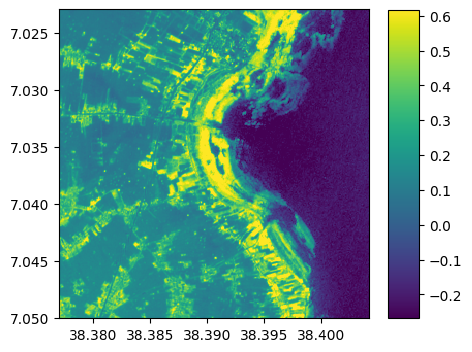

<Figure size 640x480 with 0 Axes>

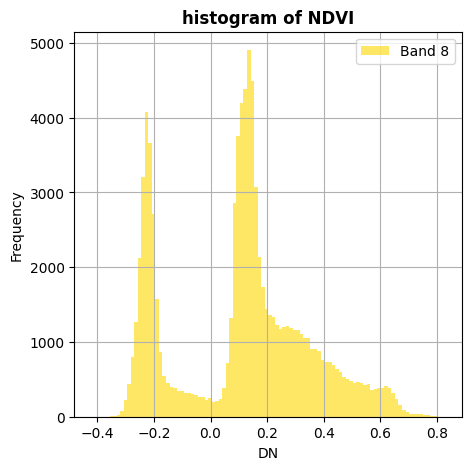

In [14]:
name_im='./data/demo/im2.tif'
image=rastereasy.Geoimage(name_im)
# Get nir band (number 8)
nir = image.select_bands(8)
# Get red band (number 4)
red = image.select_bands(4)
# Compute ndvi
ndvi=(nir-red)/(nir+red)
# check info
ndvi.info()
# plot
ndvi.visu(colorbar=True)
# Note : ndvi.colorcomp() works also
ndvi.hist(title='histogram of NDVI')


#### Identifying vegetation with (use `>`, `<`)

- Size of the image:
   - Rows (height): 300
   - Cols (width): 300
   - Bands: 1
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.03647565, 38.39059829)
- Driver: GTiff
- Data type: bool
- Projection system: EPSG:32637
- Nodata: 0

- Given names for spectral bands: 
   {'8': 1}




<Figure size 640x480 with 0 Axes>

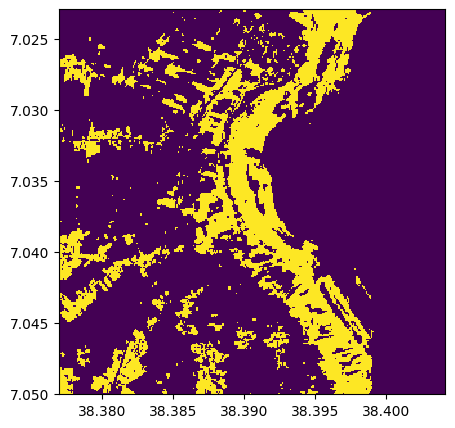

In [15]:
threshold=0.3
veget=ndvi>=threshold
veget.info()
veget.visu()


#### Identifying vegetation with ndvi.where() (similar than with numpy)

- Size of the image:
   - Rows (height): 300
   - Cols (width): 300
   - Bands: 1
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.03647565, 38.39059829)
- Driver: GTiff
- Data type: float64
- Projection system: EPSG:32637
- Nodata: nan

- Given names for spectral bands: 
   {'8': 1}


- Size of the image:
   - Rows (height): 300
   - Cols (width): 300
   - Bands: 1
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.03647565, 38.39059829)
- Driver: GTiff
- Data type: float64
- Projection system: EPSG:32637
- Nodata: nan

- Given names for spectral bands: 
   {'8': 1}




<Figure size 640x480 with 0 Axes>

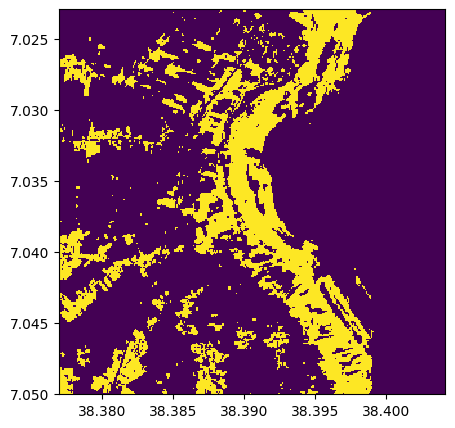

In [16]:
ndvi.info()
veget=ndvi.where(ndvi>=threshold,1,0)
veget.info()
veget.visu()

#### Identifying vegetation with  indexing

<Figure size 640x480 with 0 Axes>

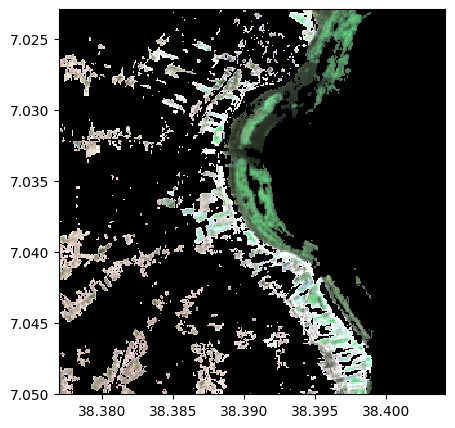

In [17]:
image2=image.copy()
image2[veget==0]=0
image2.colorcomp([4,3,2])

## Min, max of the image, per band, row, ...

In [18]:
help(image.min)
print('Overall minimum of the image : ',image.min(),'\n')
help(image.max)
print('Maximum  of the image for each band: ', image.max(axis = 'pixel'),'\n')
help(image.std)
print('Standard deviation  of the image along the lines: ',image.std(axis = 'row'),'\n')
help(image.mean)
print('Overall mean  of the image along the lines: ',image.mean(axis='row'),'\n')
print('Mean  of the image along the bands: ',image.mean(axis='band'),'\n')


Help on method min in module rastereasy.rastereasy:

min(axis=None) method of rastereasy.rastereasy.Geoimage instance
    Calculate the minimum value along a specified axis.

    Parameters
    ----------
    axis : {'band', 'row', 'col', None}, optional
        The axis along which to compute the minimum:
        - 'band': Minimum across spectral bands for each pixel
        - 'row': Minimum across rows (lines) for each band and column
        - 'col': Minimum across columns for each band and row
        - None: Global minimum of the entire image
        Default is None.

    Returns
    -------
    float or numpy.ndarray
        - If axis=None: A single value representing the global minimum
        - If axis='band': Array with shape (nb_rows,nb_cols) containing  mins along bands
        - If axis='row': Array with shape (nb_bands,nb_cols) containing mins along rows
        - If axis='col': Array with shape (nb_bands,nb_rows) containing  mins along cols
        - If axis='pixel': Arra

In [19]:
# Extract the 30th line
image[30,:]

array([[ 933,  933,  933, ...,  221,  221,  221],
       [1278, 1250, 1254, ...,  284,  271,  252],
       [1678, 1624, 1664, ...,  456,  453,  448],
       ...,
       [2828, 2828, 2828, ...,  209,  209,  209],
       [3710, 3614, 3614, ...,  193,  193,  191],
       [3570, 3470, 3470, ...,  169,  169,  161]],
      shape=(12, 300), dtype=int16)

In [20]:
# all spectral values in a given pixel
row=20
col=10
print('spectral values in',row,',',col,' : ',image[row,col])
print('size of all spectral values in row',row,':', image[row,:].shape)
print('size of all spectral values in col',col,':', image[:,col].shape)
# check consistency
pixel_row = 15
pixel_col = 22
print('diff with table with values at row ',row,' in pixel col',pixel_col,':', image[row,:][:,pixel_col]-image[row,pixel_col])
print('diff with table with values at col ',col,' in pixel row',pixel_row,':', image[:,col][:,pixel_row]-image[pixel_row,col])


spectral values in 20 , 10  :  [ 986 1254 1582 2088 2317 2445 2552 2646 2729 2727 3543 3365]
size of all spectral values in row 20 : (12, 300)
size of all spectral values in col 10 : (12, 300)
diff with table with values at row  20  in pixel col 22 : [0 0 0 0 0 0 0 0 0 0 0 0]
diff with table with values at col  10  in pixel row 15 : [0 0 0 0 0 0 0 0 0 0 0 0]


In [21]:
im1=rastereasy.Geoimage('./data/demo/sentinel.tif')
im2=rastereasy.Geoimage('./data/demo/sentinel.tif')+4